In [7]:
from nltk.corpus import stopwords
from os import listdir
from collections import Counter
from numpy import array
import numpy as np
import string
import re

In [9]:
# loading files
def load_file(filename):
    file = open(filename, encoding="utf8")
    content = file.read()
    file.close()
    return content

In [10]:
# clean file
def clean_file(file):
    # splitting into tokens
    tokens = file.split()
    # filter character
    punc = re.compile('[%s]'% re.escape(string.punctuation))
    # remove punctuation
    tokens = [punc.sub(' ', w) for w in tokens]
    # remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # filter stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter other
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [11]:
# example on one file how the file is being cleaned
filename = 'data/train/centre/BBC--2018-08-05--US police find 11 starving children in New Mexico compound'
text = load_file(filename)
tokens = clean_file(text)
print("Printing Sample tokens: ", tokens)

Printing Sample tokens:  ['Police', 'US', 'state', 'New', 'Mexico', 'rescued', 'malnourished', 'children', 'kept', 'squalid', 'conditions', 'remote', 'desert', 'The', 'local', 'office', 'said', 'aged', 'wearing', 'rags', 'like', 'Third', 'World', 'Five', 'adults', 'found', 'including', 'two', 'heavily', 'armed', 'Police', 'searched', 'site', 'receiving', 'message', 'starving', 'need', 'food', 'It', 'clear', 'group', 'ended', 'compound', 'Police', 'described', 'compound', 'small', 'underground', 'trailer', 'covered', 'running', 'water', 'Taos', 'County', 'Sheriff', 'Jerry', 'Hogrefe', 'told', 'ABC', 'News', 'children', 'thirsty', 'cop', 'never', 'seen', 'anything', 'like', 'ribs', 'poor', 'hygiene', 'No', 'fresh', 'water', 'found', 'food', 'potatoes', 'box', 'police', 'Two', 'armed', 'Siraj', 'Wahhaj', 'Lucas', 'arrested', 'The', 'three', 'women', 'also', 'detained', 'later', 'Mr', 'Hogrefe', 'told', 'ABC', 'appeared', 'women', 'children', 'brainwashed', 'feel', 'great', 'intimidation',

In [12]:
# add file to vocab
def add_file_to_vocab(filename, vocab):
    file = load_file(filename)
    tokens = clean_file(file)
    vocab.update(tokens)

In [13]:
# load all file from a folder
def process_files(folder, vocab):
    for filename in listdir(folder):
        path = folder + '/' + filename
        add_file_to_vocab(path, vocab)

In [14]:
# save list
def save_list(lines, filename):
    # convert line to text
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

In [15]:
# saving tokens to a vocabulary files
"""
vocab = Counter()
process_files('data-neta-glt/centre', vocab)
process_files('data-neta-glt/left', vocab)
process_files('data-neta-glt/right', vocab)
process_files('data-neta-glt/leanleft', vocab)
process_files('data-neta-glt/leanright', vocab)
print(len(vocab))
min_occurence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurence]
print(len(tokens))
save_list(tokens, 'vocab2.txt')
"""

"\nvocab = Counter()\nprocess_files('data-neta-glt/centre', vocab)\nprocess_files('data-neta-glt/left', vocab)\nprocess_files('data-neta-glt/right', vocab)\nprocess_files('data-neta-glt/leanleft', vocab)\nprocess_files('data-neta-glt/leanright', vocab)\nprint(len(vocab))\nmin_occurence = 2\ntokens = [k for k,c in vocab.items() if c >= min_occurence]\nprint(len(tokens))\nsave_list(tokens, 'vocab2.txt')\n"

In [16]:
print(tokens[:10])

['Police', 'US', 'state', 'New', 'Mexico', 'rescued', 'malnourished', 'children', 'kept', 'squalid']


The tokens of the vocabulary are created on the basis of minimum occurence. If any word occurs in all the articles at least two times, then the word is added in the list of tokens.

In [6]:
# load tokens
vocab = load_file('vocab2.txt')
vocab = set(vocab.split())

NameError: name 'load_file' is not defined

In [18]:
# this cleaning involves filtering out
# all the tokens not in the vocabulary
def clean_file_vocab(file, vocab):
    tokens = file.split()
    punc = re.compile('[%s]' %re.escape(string.punctuation))
    tokens = [punc.sub('', w) for w in tokens]
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

In [19]:
def process_files_vocab(folder, vocab):
    documents = list()
    for filename in listdir(folder):
        path = folder + '/' + filename
        file = load_file(path)
        tokens = clean_file_vocab(file, vocab)
        documents.append(tokens)
    return documents

$\text{We manually create a vector of all the categories and create a vector with values 1 and 0. So, the vector of categories will be [left, leanleft, centre, leanright, right]. If we want to label a class left, then we'll write it as [1, 0, 0, 0, 0].}$

In [20]:
# load and clean dataset for training
def clean_dataset(vocab, left_data, leanleft_data, centre_data, leanright_data, right_data):
    # load files
    left = process_files_vocab(left_data, vocab)
    leanleft = process_files_vocab(leanleft_data, vocab)
    centre = process_files_vocab(centre_data, vocab)
    leanright = process_files_vocab(leanright_data, vocab)
    right = process_files_vocab(right_data, vocab)
    
    files = left + leanleft + centre + leanright + right
    # labelling dataset
    # taken help from here: https://nlp.stanford.edu/IR-book/html/htmledition/classification-with-more-than-two-classes-1.html
    
    labels = array([[1, 0, 0, 0, 0] for _ in range(len(left))] + [[0, 1, 0, 0, 0] for _ in range(len(leanleft))] 
                   + [[0, 0, 1, 0, 0] for _ in range(len(centre))] + [[0, 0, 0, 1, 0] for _ in range(len(leanright))]
                   + [[0, 0, 0, 0, 1] for _ in range(len(right))])
    return files, labels

In [2]:
# necessary modules to tokenize the text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [3]:
# fitting tokenizer on texts
def new_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [4]:
# encode documents as integer and pad documents
def encode_and_pad(tokenizer, max_length, files):
    # encoding
    encoded = tokenizer.texts_to_sequences(files)
    # padding
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

The data is splitted using a library called split-folders

In [24]:
train_files, ytrain = clean_dataset(vocab, 'data/train/left', 'data/train/leanleft', 
                                    'data/train/centre', 'data/train/leanright', 'data/train/right')

In [25]:
train_files[5]

'West Bengal Election Anarchy Is Latest Example Democracy Going Down Drain Last Saturday Election Commission West Bengal India Singh held meeting election observers Kolkata Singh exasperated Total anarchy going state told colleagues He detailed least six incidents anarchy across state When man like Singh uses word anarchy means mayhem disorder It stiff word use It refers fact state administration lost control streets West Bengal governed Trinamul Congress TMC hold local body elections seats across state million people These elections held first week May Across state opposition candidates went file nomination papers thugs associated TMC beat denied basic democratic rightto run elections If violence taken place rural West Bengal urban newspapers might noticed But Saturday TMC sent armed gangs heart fight challengers Trinamul men firearms moved around district headquarters presence police officers said Lahiri local leader Communist Party India Marxist We couldnt file single nomination The

In [26]:
ytrain[5]

array([1, 0, 0, 0, 0])

In [27]:
tokenizer = new_tokenizer(train_files)

In [28]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

91679


In [29]:
max_length = max([len(s.split()) for s in train_files])
print(max_length)

8346


In [30]:
# encode
Xtrain = encode_and_pad(tokenizer, max_length, train_files)

In [31]:
Xtrain[200]

array([ 1690, 58380,   211, ...,     0,     0,     0])

In [32]:
val_files, yval = clean_dataset(vocab, 'data/val/left', 'data/val/leanleft', 
                                    'data/val/centre', 'data/val/leanright', 'data/val/right')

In [33]:
tokenizer_val = new_tokenizer(val_files)

In [34]:
Xval = encode_and_pad(tokenizer_val, max_length, val_files)

In [35]:
# import libraries
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Embedding, Input, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D

$\text{Sequential n-grams + CNN model}$

In [36]:
"""
def sequential_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    # 2 grams
    model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    

    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    return model
"""

"\ndef sequential_model(vocab_size, max_length):\n    model = Sequential()\n    model.add(Embedding(vocab_size, 100, input_length=max_length))\n    # 2 grams\n    model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))\n    model.add(MaxPooling1D(pool_size=2))\n    \n\n    model.add(Flatten())\n    \n    model.add(Dense(50, activation='relu'))\n    model.add(Dense(5, activation='softmax'))\n    \n    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n    \n    model.summary()\n    return model\n"

In [37]:
"""
model = sequential_model(vocab_size, max_length)
H = model.fit(Xtrain, ytrain, epochs=10, batch_size=32, validation_data=(Xval, yval))
model.save('sequential_10epochwithval.h5')
"""

"\nmodel = sequential_model(vocab_size, max_length)\nH = model.fit(Xtrain, ytrain, epochs=10, batch_size=32, validation_data=(Xval, yval))\nmodel.save('sequential_10epochwithval.h5')\n"

Plotting

In [38]:
"""
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('sequential_10epochwithval.png')
plt.show()
"""

'\nimport matplotlib.pyplot as plt\n\n%matplotlib inline\nplt.style.use("ggplot")\nplt.figure()\nplt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")\nplt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")\nplt.title("Training Loss and Accuracy")\nplt.xlabel("Epoch #")\nplt.ylabel("Loss/Accuracy")\nplt.legend()\nplt.savefig(\'sequential_10epochwithval.png\')\nplt.show()\n'

In [39]:
# model = load_model('sequential_10epochwithval.h5')

In [40]:
#loss, acc = model.evaluate(Xtest, ytest, verbose=0)
#print(acc, loss)

Model V3

In [41]:
def sequential_modelv3(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 128, input_length=max_length))
    # 2 grams
    model.add(Conv1D(filters=64, kernel_size=16, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=16, activation='relu'))
    model.add(Dropout(0.5))

    
    model.add(MaxPooling1D(pool_size=2))
    

    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    return model

In [42]:
modelv3 = sequential_modelv3(vocab_size, max_length)
H_v3 = modelv3.fit(Xtrain, ytrain, epochs=10, batch_size=32)
modelv3.save('sequentialv3_25epoch.h5')

W0809 13:11:56.691138 22776 deprecation_wrapper.py:119] From C:\Users\Vedansh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8346, 128)         11734912  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8331, 64)          131136    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8316, 64)          65600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8316, 64)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4158, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 266112)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

W0809 13:12:01.237561 22776 deprecation_wrapper.py:119] From C:\Users\Vedansh\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
25480/25480 [==============================] - 221s 9ms/step - loss: 1.5876 - accuracy: 0.2452
Epoch 2/10
25480/25480 [==============================] - 217s 9ms/step - loss: 1.3811 - accuracy: 0.4211
Epoch 3/10
25480/25480 [==============================] - 217s 9ms/step - loss: 1.0731 - accuracy: 0.5668
Epoch 4/10
25480/25480 [==============================] - 215s 8ms/step - loss: 0.7987 - accuracy: 0.6873
Epoch 5/10
25480/25480 [==============================] - 214s 8ms/step - loss: 0.5654 - accuracy: 0.7880
Epoch 6/10
25480/25480 [==============================] - 216s 8ms/step - loss: 0.4336 - accuracy: 0.8375
Epoch 7/10
25480/25480 [==============================] - 217s 9ms/step - loss: 0.3494 - accuracy: 0.8677
Epoch 8/10
25480/25480 [==============================] - 217s 9ms/step - loss: 0.2951 - accuracy: 0.8868
Epoch 9/10
25480/25480 [==============================] - 216s 8ms/step - loss: 0.4820 - accuracy: 0.8869
Epoch 10/10
25480/25480 [=====================

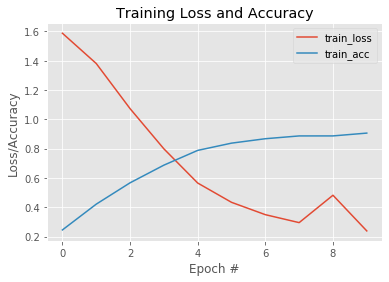

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H_v3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H_v3.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('sequentialv3_25epoch.png')
plt.show()

In [5]:
test_files, ytest = clean_dataset(vocab, 'data/test/left', 'data/test/leanleft', 
                                    'data/test/centre', 'data/test/leanright', 'data/test/right')

NameError: name 'clean_dataset' is not defined

In [52]:
tokenizer_test = new_tokenizer(test_files)

In [53]:
Xtest = encode_and_pad(tokenizer_test, max_length, test_files)

In [54]:
from keras.models import load_model

In [1]:
modelv3 = load_model('sequential_10epochwithval.h5')

NameError: name 'load_model' is not defined

In [ ]:
loss, acc = modelv3.evaluate(Xtest, ytest, verbose=0)
print(acc, loss)

In [ ]:
ypred = model.predict(Xtest, verbose=0)